<a href="https://colab.research.google.com/github/SatyamRastogiD/MOOCs/blob/master/Classification_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_Class = pd.read_csv('/content/Movie_classification.csv', header = 0)

In [10]:
data_Class.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [11]:
data_Class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [12]:
data_Class["Time_taken"].fillna(value = data_Class["Time_taken"].mean(), inplace = True)

In [13]:
data_Class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [14]:
data_Class = pd.get_dummies(data_Class, columns = ["3D_available", "Genre"], drop_first = True)

In [15]:
data_Class.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,1,0,0,1,0


X-y Split

In [16]:
X = data_Class.loc[:,data_Class.columns != "Start_Tech_Oscar"]
y = data_Class["Start_Tech_Oscar"]

Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

Training Classification Tree

In [19]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [20]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predict Values using x_train and x_test

In [21]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

Model Performance

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]])

In [24]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]])

In [25]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

Plotting Decision Tree

In [26]:
dot_data = tree.export_graphviz(clftree, out_file= None, feature_names= X_train.columns, filled = True)
from IPython.display import Image
import pydotplus

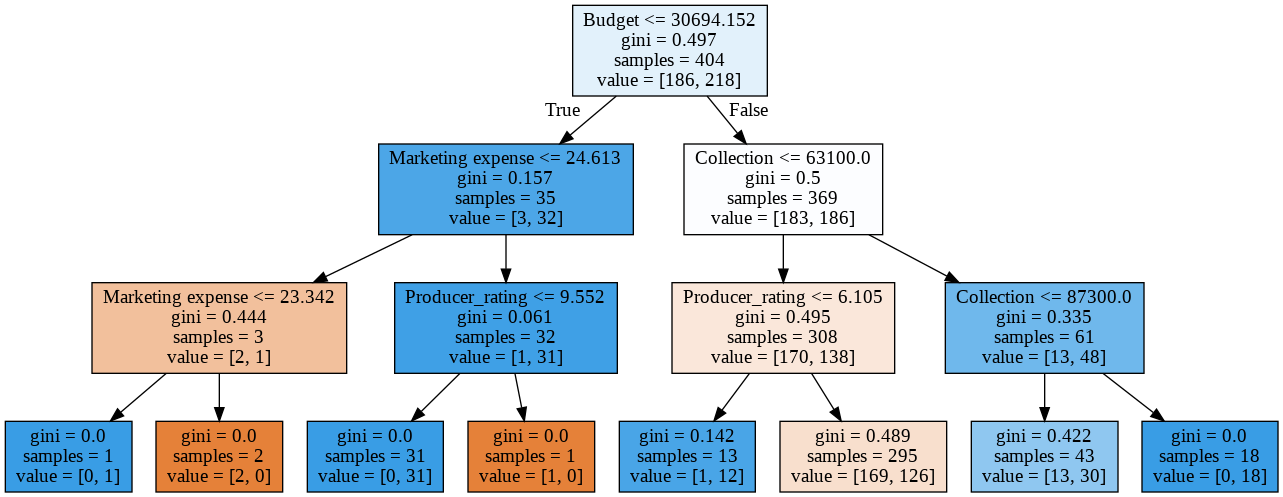

In [27]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Controlling tree Growth

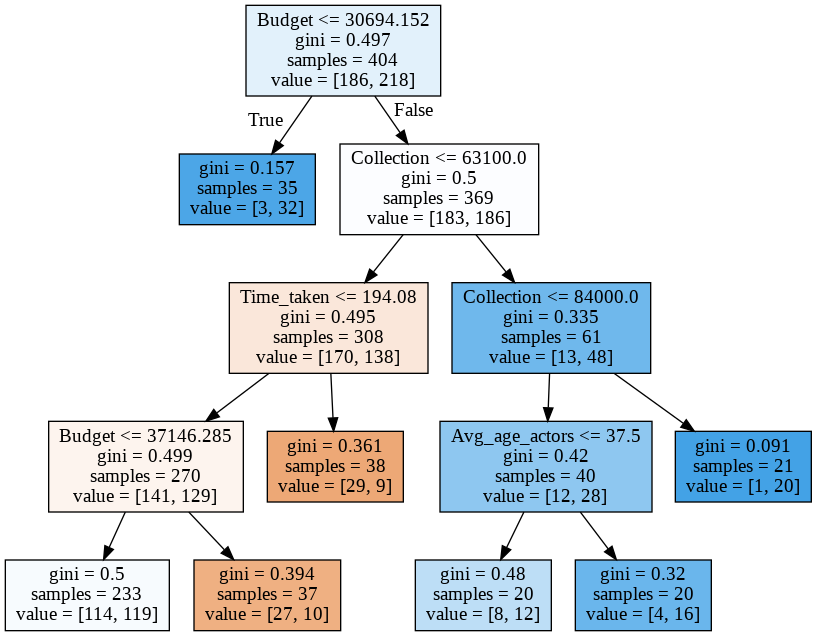

In [28]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file= None, feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [29]:
accuracy_score(y_test,clftree2.predict(X_test))

0.5588235294117647

Bagging


In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bag_clf = BaggingClassifier(base_estimator= clftree, n_estimators= 1000,
                            bootstrap = True, n_jobs = 1,
                            random_state = 42)

In [32]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [33]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[36,  8],
       [32, 26]])

In [34]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6078431372549019

Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_clf = RandomForestClassifier(n_estimators = 1000, n_jobs= -1 , random_state= 42)

In [37]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [38]:
confusion_matrix(y_train, rf_clf.predict(X_train))

array([[186,   0],
       [  0, 218]])

In [39]:
accuracy_score(y_train, rf_clf.predict(X_train))

1.0

In [40]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]])

In [41]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
rf_clf2 = RandomForestClassifier( n_estimators= 250 ,random_state= 42)

In [44]:
param_grid = {"max_features"  : [4,5,6,7,8,9,10],
              "min_samples_split" : [2,3,10]}

In [45]:
grid_search = GridSearchCV(rf_clf2, param_grid,n_jobs= -1, cv =5, scoring = 'accuracy')

In [46]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [47]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [48]:
cvrf_clf = grid_search.best_estimator_

In [49]:
accuracy_score(y_test,cvrf_clf.predict(X_test))

0.6274509803921569

In [50]:
confusion_matrix(y_test,cvrf_clf.predict(X_test))

array([[25, 19],
       [19, 39]])

Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [54]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5882352941176471

In [58]:
gbc_clf2 = GradientBoostingClassifier( n_estimators= 1000, learning_rate= 0.02, max_depth= 1)

In [59]:
gbc_clf2.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [60]:
accuracy_score(y_train , gbc_clf2.predict(X_train))

0.7623762376237624

In [61]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.6176470588235294

In [69]:
gbc_clf_grid_search = GradientBoostingClassifier( n_estimators= 250 ,random_state= 42)
param_grid = {"learning_rate"  : [0.03,0.02,0.01,0.1],
              "max_depth" : [1,2,3,4,5,6],
              "n_estimators" : [200,500,750,1000]}

In [70]:
grid_search = GridSearchCV(gbc_clf_grid_search, param_grid,n_jobs= -1, cv = 5, scoring = 'accuracy')

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=250,
                                                  n_iter_no_change=None,
         

In [72]:
grid_search.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1000}

In [73]:
cvrf_gbc_clf_grid_search = grid_search.best_estimator_

In [74]:
accuracy_score(y_test,cvrf_gbc_clf_grid_search.predict(X_test))

0.5784313725490197

In [75]:
confusion_matrix(y_test,cvrf_gbc_clf_grid_search.predict(X_test))

array([[26, 18],
       [25, 33]])

AdaBoost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ada_clf = AdaBoostClassifier( n_estimators= 1000, learning_rate= 0.02)

In [78]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.02,
                   n_estimators=1000, random_state=None)

In [79]:
accuracy_score(y_train, ada_clf.predict(X_train))

0.7648514851485149

In [81]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.5980392156862745

In [82]:
ada_clf2 = AdaBoostClassifier(rf_clf, n_estimators= 500 , learning_rate= 0.05)

In [85]:
ada_clf2.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [86]:
accuracy_score(y_test, ada_clf2.predict(X_test))

0.6372549019607843

XGBoost

In [87]:
import xgboost as xgb

In [88]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators= 10000, learning_rate=0.3, n_jobs= -1 )

In [89]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:
accuracy_score(y_train, xgb_clf.predict(X_train))

1.0

In [93]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6666666666666666

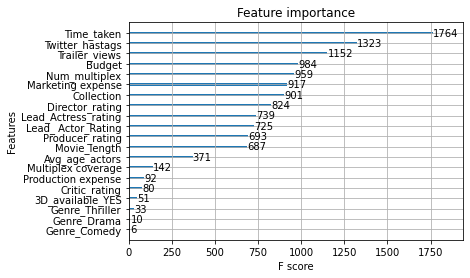

In [94]:
xgb.plot_importance(xgb_clf)

In [95]:
xgb_clf2 = xgb.XGBClassifier(n_estimators=250, learning_rate= 0.1, random_state =42)

In [97]:
param_grid = {
    'max_depth' : range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample' : [0.8,0.9],
    'colsample_bytree' : [0.8,0.9],
    'reg_alpha' : [1e-2,0.1,1]
}

In [99]:
grid_search = GridSearchCV( xgb_clf, param_grid, n_jobs= -1, cv = 5, scoring = 'accuracy')

In [100]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.3, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=10000,
                                     n_jobs=-1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
 

In [102]:
cvxg_clf = grid_search.best_estimator_

In [103]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.6274509803921569